The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/nobel.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

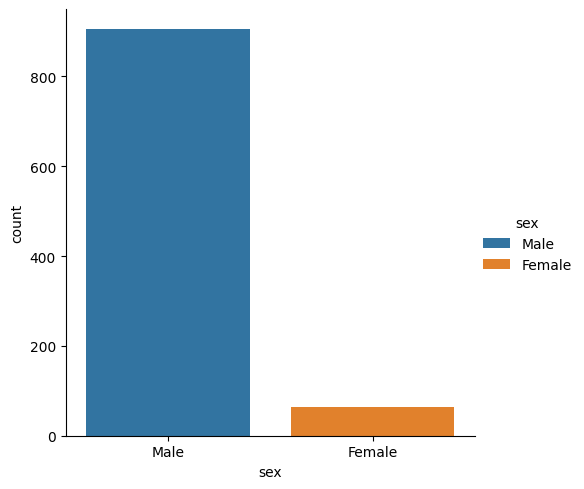

In [3]:
sns.catplot(x= "sex", data= df, kind= "count", hue= "sex")

In [4]:
top_gender = 'Male'

In [5]:
df['birth_country'].value_counts().max()

np.int64(291)

In [6]:
countries = df['birth_country'].value_counts()
top = countries[countries == countries.max()]
top_country= "United States of America"
top


birth_country
United States of America    291
Name: count, dtype: int64

In [7]:
df["USA_born"] = df["birth_country"] == "United States of America"

In [8]:
df["USA_born"]

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999     True
Name: USA_born, Length: 1000, dtype: bool

In [9]:
df["decade"] = (np.floor(df["year"]/10)*10).astype(int)

In [10]:
df["decade"]

0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
995    2020
996    2020
997    2020
998    2020
999    2020
Name: decade, Length: 1000, dtype: int64

In [11]:
US_born = df.groupby("decade", as_index= False)["USA_born"].mean()
US_born

,decade,USA_born
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


In [12]:
max_decade_usa = US_born[US_born["USA_born"] == US_born["USA_born"].max()]["decade"].values[0]
max_decade_usa

np.int64(2000)

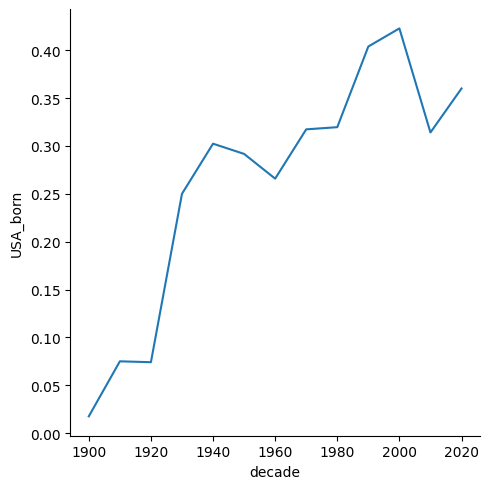

In [13]:
sns.relplot(x= "decade", y= "USA_born", data= US_born, kind= "line")

In [14]:
df["female_win"] = df["sex"] == "Female"
df["female_win"]

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998     True
999     True
Name: female_win, Length: 1000, dtype: bool

In [15]:
Female_laureates = df.groupby(['decade', 'category'], as_index= False)['female_win'].mean()
Female_laureates

,decade,category,female_win
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


In [16]:
max_female = Female_laureates[Female_laureates["female_win"] == Female_laureates["female_win"].max()]
max_female_dict = dict()
max_female_dict[max_female["decade"].values[0]] = max_female["category"].values[0]
max_female_dict

{np.int64(2020): 'Literature'}

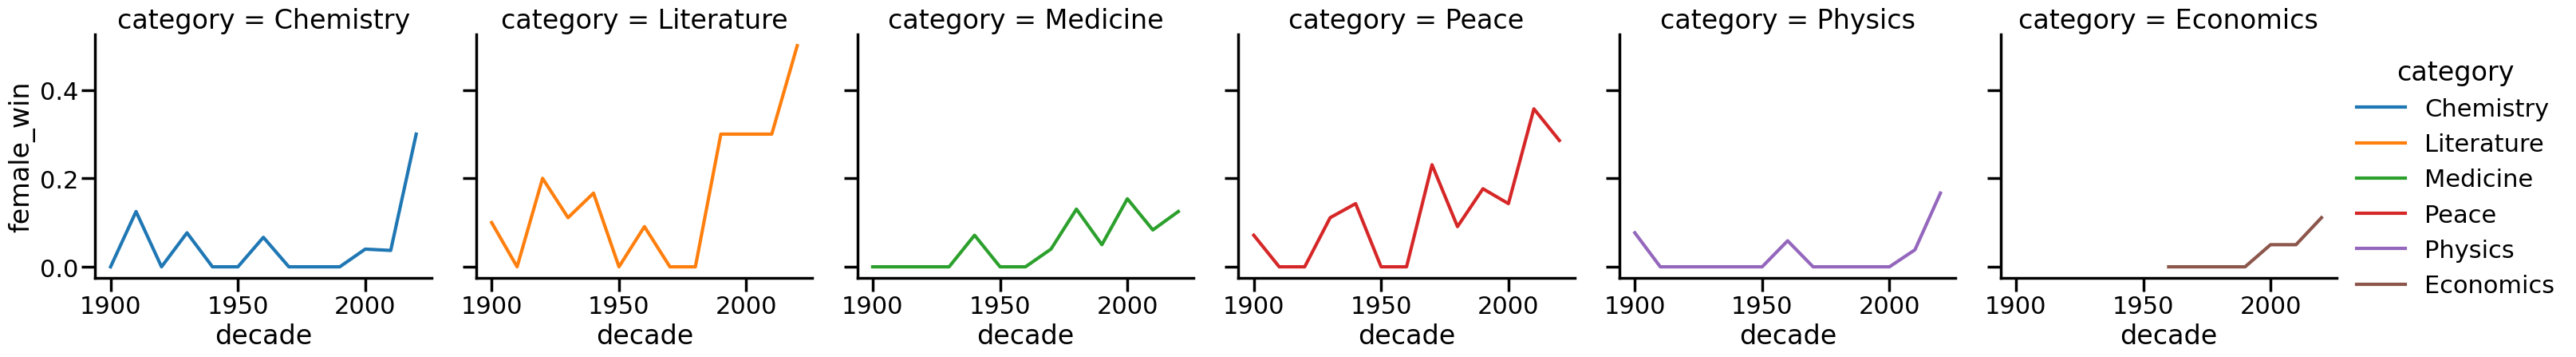

In [ ]:
sns.set_context("poster")

sns.relplot(x= "decade", y= "female_win", data= Female_laureates, kind= "line", hue= "category",col= "category")


In [18]:
female_df = df[df["female_win"]]
min_row = female_df[female_df["year"] == female_df["year"].min()]
first_woman_name = min_row["full_name"].values[0]
first_woman_category = min_row["category"].values[0]


In [19]:
counts = df["full_name"].value_counts()
repeat = counts[counts >= 2].index
repeat_list = list(repeat)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'John Bardeen',
 'Linus Carl Pauling']